In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("customer_acquisition_data.csv")
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


## Distribution of Acquisition Cost

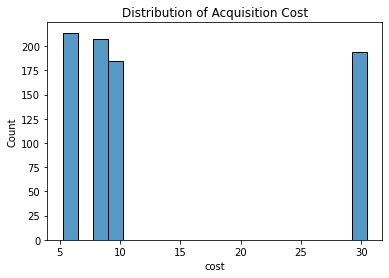

In [2]:
fig = sns.histplot(data, 
                   x="cost", 
                   bins=20)
plt.title('Distribution of Acquisition Cost')
plt.show()

## Distribution of Revenue

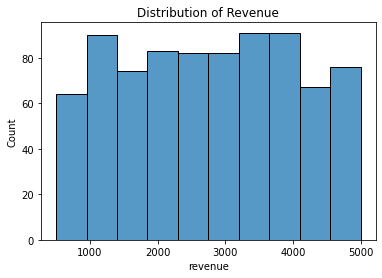

In [3]:
fig = sns.histplot(data, 
                   x="revenue", 
                   bins=10)
plt.title('Distribution of Revenue')
plt.show()

## Customer Acquisition Cost by Channel

In [4]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

cost_by_channel

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


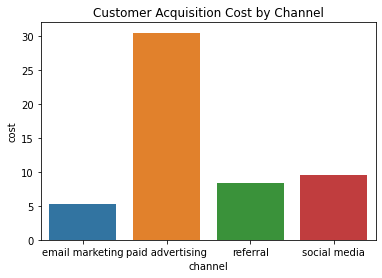

In [5]:
fig = sns.barplot(data=cost_by_channel, 
             x="channel", 
             y="cost") 
plt.title('Customer Acquisition Cost by Channel')
plt.show()

- Paid advertisement is the most expensive channel
- Email marketing is the least expensive channel

## Conversion Rate by Channel

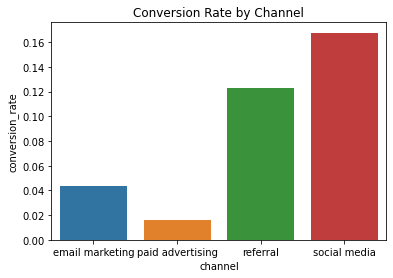

In [6]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

fig = sns.barplot(data=conversion_by_channel, x='channel', 
             y='conversion_rate') 
plt.title('Conversion Rate by Channel')
plt.show()

- Social media is the most effective channel for converting customers
- Paid advertising is the least effective.

## Total Revenue by Channel

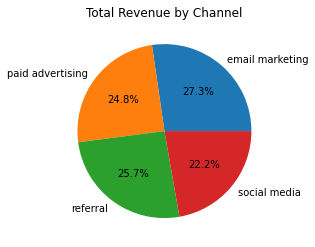

In [7]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

plt.pie(revenue_by_channel['revenue'],labels=revenue_by_channel['channel'],autopct='%1.1f%%')
plt.title('Total Revenue by Channel')
plt.show()

## Return on Investment (ROI) by Channel

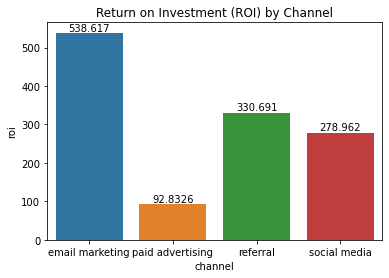

In [8]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

fig = sns.barplot(data=roi_by_channel, 
             x='channel', 
             y='roi')
fig.bar_label(fig.containers[0])
plt.title('Return on Investment (ROI) by Channel')
plt.show()

## Customer Lifetime Value by Channel

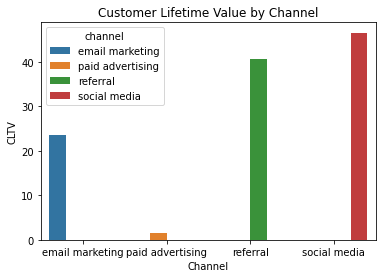

In [9]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

fig = sns.barplot(data=channel_cltv, x='channel', y='cltv', hue='channel')
plt.title('Customer Lifetime Value by Channel')

plt.xlabel('Channel')
plt.ylabel('CLTV')

plt.show()

Customer lifetime value from Social Media is the highest followed by referral channels 

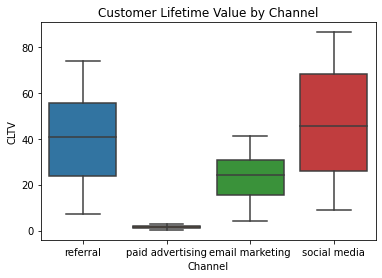

In [10]:
subset = data.loc[data['channel'].isin(['social media', 'referral','email marketing','paid advertising'])]

fig = sns.boxplot(data=subset, x='channel', y='cltv')

plt.title('Customer Lifetime Value by Channel')

plt.xlabel('Channel')
plt.ylabel('CLTV')

plt.show()